In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zoryawka/nltk_data...


True

In [2]:
analyzer = SentimentIntensityAnalyzer()


In [4]:
message_random = "Sounds gd... Haha... Can... Wah, u yan jiu so fast liao.."
scores = analyzer.polarity_scores(message_random)
print(f"Message: {message_random}")
print(f"Scores: {scores}")
message_random_1 = "U r 1 fukn lazy bad !couldnt u chk it urself"
scores_1 = analyzer.polarity_scores(message_random_1)
print(f"Scores: {scores_1}")

Message: Sounds gd... Haha... Can... Wah, u yan jiu so fast liao..
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Scores: {'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.7424}


In [ ]:
def sentiment_analysis(text):
    scores  = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment 


sentiment = sentiment_analysis(message_random_1)
print(sentiment)

negative


In [28]:
df  = pd.read_csv('processed_cleaned_sms.csv')
df.drop(
    labels=["length", "year", "month", "Message_clean", "Message_tokenized", "Message_tokenized_nostop"],
    axis=1,
    inplace=True
)

df.head()

,id,Message,country,Date,Message_lemmatized
0,10120,Bugis oso near wat...,Singapore,2003/4,"['bugis', 'oso', 'near', 'wat']"
1,10121,"Go until jurong point, crazy.. Available only ...",Singapore,2003/4,"['go', 'jurong', 'point', 'crazy', 'available'..."
2,10122,I dunno until when... Lets go learn pilates...,Singapore,2003/4,"['dunno', 'let', 'go', 'learn', 'pilate']"
3,10123,Den only weekdays got special price... Haiz......,Singapore,2003/4,"['den', 'weekday', 'get', 'special', 'price', ..."
4,10124,Meet after lunch la...,Singapore,2003/4,"['meet', 'lunch', 'la']"


In [29]:
#df['Sentiment Raw Scores'] = df["Message"].apply(analyzer.polarity_scores)
df["Sentiment Raw Label"] = df["Message"].apply(sentiment_analysis)

df.head()

,id,Message,country,Date,Message_lemmatized,Sentiment Raw Label
0,10120,Bugis oso near wat...,Singapore,2003/4,"['bugis', 'oso', 'near', 'wat']",neutral
1,10121,"Go until jurong point, crazy.. Available only ...",Singapore,2003/4,"['go', 'jurong', 'point', 'crazy', 'available'...",positive
2,10122,I dunno until when... Lets go learn pilates...,Singapore,2003/4,"['dunno', 'let', 'go', 'learn', 'pilate']",neutral
3,10123,Den only weekdays got special price... Haiz......,Singapore,2003/4,"['den', 'weekday', 'get', 'special', 'price', ...",positive
4,10124,Meet after lunch la...,Singapore,2003/4,"['meet', 'lunch', 'la']",neutral


In [31]:
sentiment_counts = df['Sentiment Raw Label'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
Sentiment Raw Label
positive    21313
neutral     21048
negative     5628
Name: count, dtype: int64


In [32]:
import matplotlib.pyplot as plt

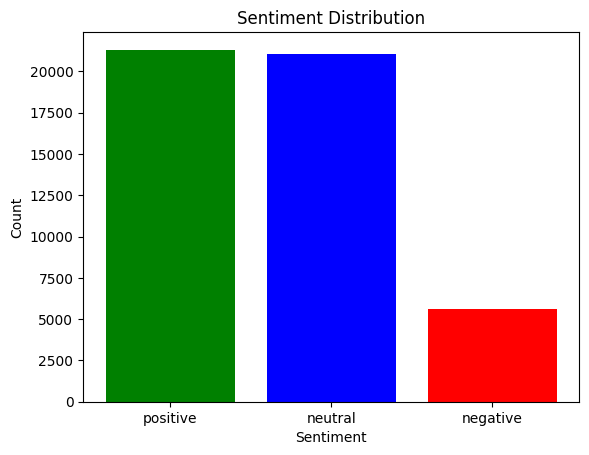

In [33]:
sentiments = ["positive", "neutral", "negative"]
counts = [21313, 21048, 5628]

plt.bar(sentiments, counts, color=["green", "blue", "red"])

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

plt.show()

<Figure size 1400x800 with 0 Axes>

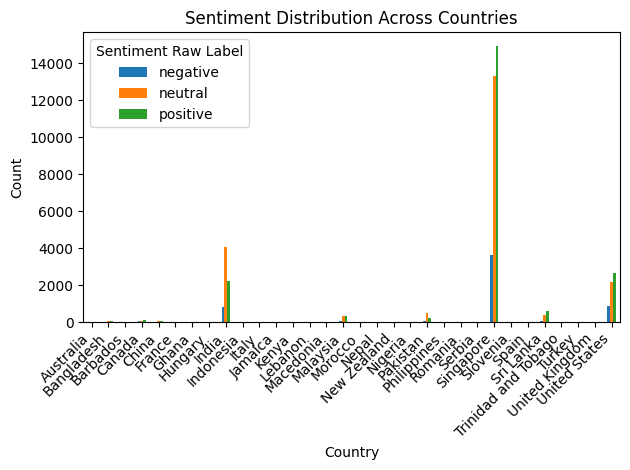

In [34]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sentiment_by_country = df.groupby(['country', 'Sentiment Raw Label']).size().unstack()
sentiment_by_country.plot(kind='bar', stacked=False)
plt.title('Sentiment Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47989 entries, 0 to 47988
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   47989 non-null  int64 
 1   Message              47989 non-null  object
 2   country              47989 non-null  object
 3   Date                 47989 non-null  object
 4   Message_lemmatized   47989 non-null  object
 5   Sentiment Raw Label  47989 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.2+ MB


/var/folders/0y/rphp_xjs4552mfm0mn5qx40w0000gn/T/ipykernel_27610/2703545556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


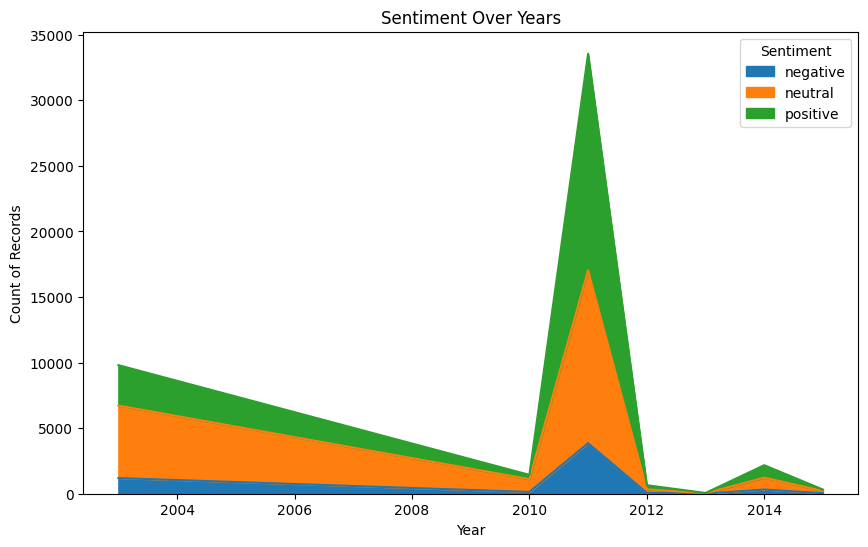

In [50]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year


#count occurences using size()
grouped_data = df.groupby(["Year", "Sentiment Raw Label"]).size().reset_index(name = "count")
pivoted = grouped_data.pivot(index="Year", columns="Sentiment Raw Label", values="count").fillna(0)

pivoted.plot(kind="area", figsize=(10,6))
plt.title("Sentiment Over Years")
plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.legend(title="Sentiment")
plt.show()

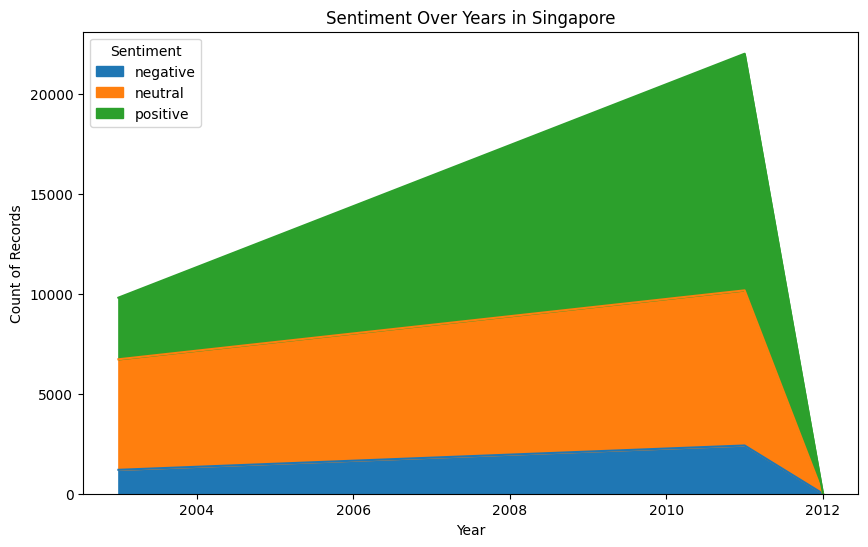

In [ ]:
df_singapore = df[df["country"] == "Singapore"]

#count occurences using size()
grouped_data = df_singapore.groupby(["Year", "Sentiment Raw Label"]).size().reset_index(name = "count")
pivoted = grouped_data.pivot(index="Year", columns="Sentiment Raw Label", values="count").fillna(0)

pivoted.plot(kind="area", figsize=(10,6))
plt.title("Sentiment Over Years in Singapore")
plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.legend(title="Sentiment")
plt.show()

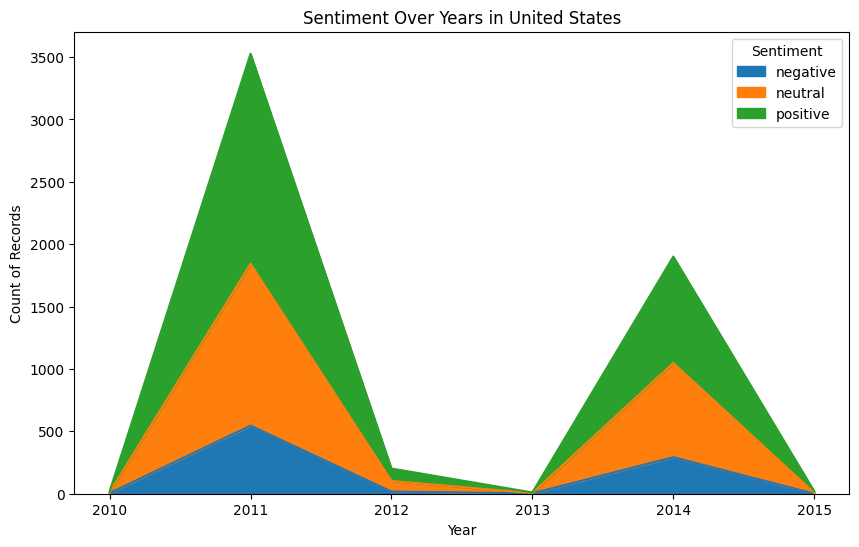

In [ ]:
df_us = df[df["country"] == "United States"]

#count occurences using size()
grouped_data = df_us.groupby(["Year", "Sentiment Raw Label"]).size().reset_index(name = "count")
pivoted = grouped_data.pivot(index="Year", columns="Sentiment Raw Label", values="count").fillna(0)

pivoted.plot(kind="area", figsize=(10,6))
plt.title("Sentiment Over Years in United States")
plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.legend(title="Sentiment")
plt.show()

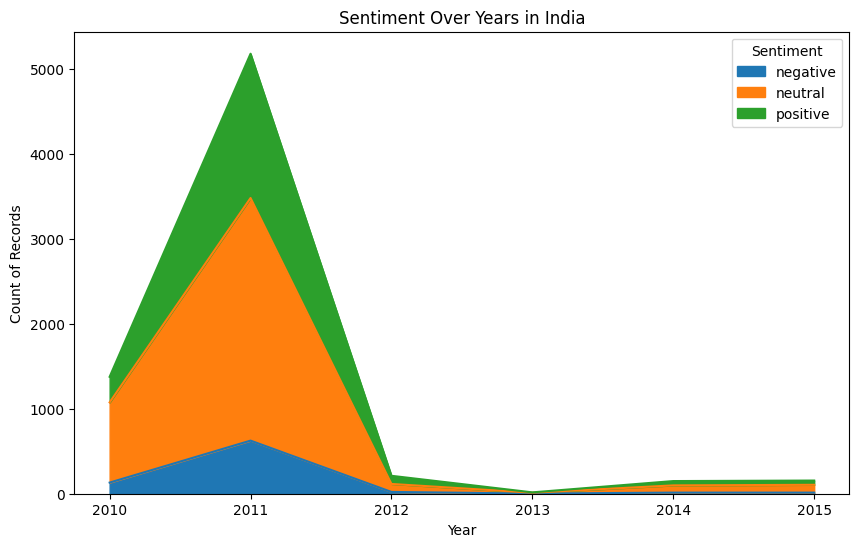

In [57]:
df_india = df[df["country"] == "India"]

#count occurences using size()
grouped_data = df_india.groupby(["Year", "Sentiment Raw Label"]).size().reset_index(name = "count")
pivoted = grouped_data.pivot(index="Year", columns="Sentiment Raw Label", values="count").fillna(0)

pivoted.plot(kind="area", figsize=(10,6))
plt.title("Sentiment Over Years in India")
plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.legend(title="Sentiment")
plt.show()